## Loading medical image data
In this notebook, the non-scoliotic and scoliotic data for the project is showcased. This data can be used to write an algorithm to find the optimal viewing angle for clinicians using a C-arm.

In [1]:
# Library imports
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os

from util import *

## Bone MRI DICOM images

In [2]:
# Define path of patient dataset
patient_path = "boneMRI/20240119_BoneMRI_EBS23"

# Load dicom data
dicom_image = load_3d_dicom(patient_path)
print(f"The shape of the image is {dicom_image.shape}")

The shape of the image is (100, 672, 672)


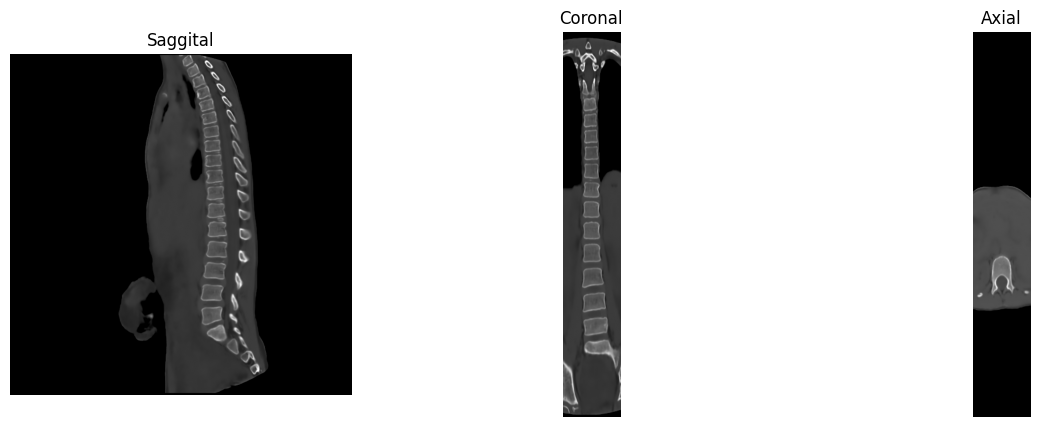

In [3]:
def plot_bonemri(image, window_level, window_width, slice_idx=None):
    # Get middle slices if slice_idx not specified
    if slice_idx is None:
        slice_idx = {
            "sagittal": image.shape[0] // 2,
            "axial": image.shape[1] // 2,
            "coronal": image.shape[2] // 2
        }

    # Apply window and normalize to 0-255
    image = apply_window(image, window_level, window_width)

    # Create figure with one row and two columns
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    [axes.set_axis_off() for axes in ax.flatten()]

    # Sagittal Slice
    ax[0].imshow(image[slice_idx["sagittal"],:,:], cmap="gray")
    ax[0].set_title("Saggital")
    # Axial Slice
    ax[2].imshow(np.rot90(image[:,slice_idx["axial"],:], 3), cmap="gray")
    ax[2].set_title("Axial")
    # Coronal Slice
    ax[1].imshow(np.rot90(image[:,:,slice_idx["coronal"]], 3), cmap="gray")
    ax[1].set_title("Coronal")

    plt.show()

slice_idx = {
    "sagittal": dicom_image.shape[0] // 2,
    "axial": dicom_image.shape[1] // 2,
    "coronal": 400
}
plot_bonemri(image=dicom_image, window_level=450, window_width=1500, slice_idx=slice_idx)

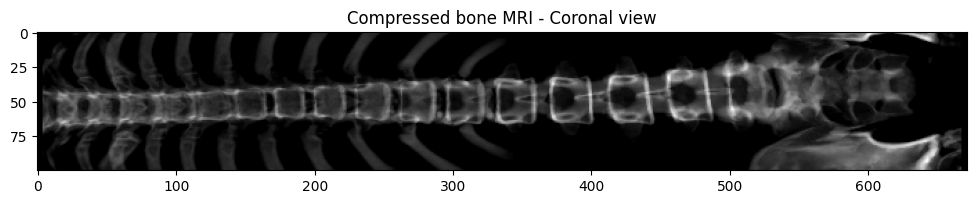

In [4]:
def compress_bonemri(image, window_level, window_width, compress_axis=0):
    # Apply window and normalize to 0-255
    image = apply_window(image, window_level, window_width)

    threshold_min = 100  # Lower limit
    threshold_max = 255  # Upper limit

    # Apply thresholding (set values outside range to 0)
    binary_image = np.where((image >= threshold_min) & (image <= threshold_max), image, 0)

    # Compress the 3D image to 2D using max projection
    compressed_image = np.sum(binary_image, axis=compress_axis)

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.imshow(compressed_image, cmap="gray")
    ax.set_title("Compressed bone MRI - Coronal view")

    plt.show()

# Example usage
compress_bonemri(dicom_image, window_level=450, window_width=1500, compress_axis=2)